# Spectral

This notebook illustrates the spectral embedding of a graph by the [spectral decomposition](https://scikit-network.readthedocs.io/en/latest/reference/embedding.html#module-sknetwork.embedding) of the Laplacian.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import sknetwork as skn

## Undirected graphs

**Loading**

In [2]:
adjacency, labels = skn.toy_graphs.karate_club(return_labels=True)
adjacency

<34x34 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

**Embedding**

In [3]:
spectral = skn.embedding.Spectral()
spectral.fit(adjacency)

Spectral(embedding_dimension=2, normalized_laplacian=True, regularization=0.01, relative_regularization=True, scaling='multiply', solver=LanczosEig(which='LA'), tol=1e-10)

In [4]:
embedding = spectral.embedding_
embedding.shape

(34, 2)

**Visualization**

In [5]:
graph = nx.from_scipy_sparse_matrix(adjacency)

In [6]:
colors = ['r', 'b']

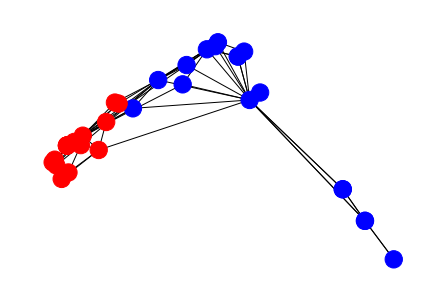

In [7]:
nx.draw(graph, pos=embedding, node_color=[colors[l] for l in labels])

**Metrics**

In [8]:
skn.embedding.cosine_modularity(adjacency, embedding)

0.649561271964528

**Parameters**

In [9]:
# embedding dimension
spectral = skn.embedding.Spectral(embedding_dimension=10)
spectral.fit(adjacency)

Spectral(embedding_dimension=10, normalized_laplacian=True, regularization=0.01, relative_regularization=True, scaling='multiply', solver=LanczosEig(which='LA'), tol=1e-10)

In [10]:
# regularization
spectral = skn.embedding.Spectral(regularization=1)
spectral.fit(adjacency)

Spectral(embedding_dimension=2, normalized_laplacian=True, regularization=1, relative_regularization=True, scaling='multiply', solver=LanczosEig(which='LA'), tol=1e-10)

In [12]:
# regular Laplacian
spectral = skn.embedding.Spectral(normalized_laplacian=False, scaling=None)
spectral.fit(adjacency)

Spectral(embedding_dimension=2, normalized_laplacian=False, regularization=0.01, relative_regularization=True, scaling=None, solver=LanczosEig(which='SM'), tol=1e-10)

In [13]:
# solver
spectral = skn.embedding.Spectral(solver='halko')
spectral.fit(adjacency)

Spectral(embedding_dimension=2, normalized_laplacian=True, regularization=0.01, relative_regularization=True, scaling='multiply', solver=HalkoEig(which='LA', n_oversamples=10, n_iter='auto', power_iteration_normalizer='auto', one_pass=False), tol=1e-10)